## Pracuj and Careerjet one day 'python scraping' visualizations

In [1]:
import pandas as pd
from datetime import datetime, date
import pickle
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import math
import numpy as np

In [2]:
path = r'../scraping_results/'
df = pd.read_csv(path + 'python_django_combined.csv', index_col=0)
df.sample(5)

,title,link,company,location,salary,description,date_added,skills,search_term,date_searched
132,NaN,NaN,NaN,NaN,NaN,Looking for an exciting career opportunity? Co...,NaN,"['Python', 'SQL']",python,2023-11-25
304,"Inżynier ds. Standardów, Rozwoju i Utrzymania ...",https://www.pracuj.pl/praca/inzynier-ds-standa...,NaN,NaN,NaN,NaN,NaN,[],python,2023-11-25
12,Web Engineer (Python),careerjet.pl/jobad/plde9f4cf90fdec6b8d158cd6c7...,OANDA,"Kraków, małopolskie",NaN,OANDA is a global leader in online multi-asset...,NaN,NaN,python,2023-11-27
46,Technical Support Engineer (hybrid job + reloc...,careerjet.pl/jobad/pl8d87328923e13d86783f01f16...,NaN,"Kraków, małopolskie",NaN,We are looking for a Technical Support Enginee...,NaN,NaN,python,2023-11-25
137,BIG DATA Analyst,https://www.pracuj.pl/praca/big-data-analyst-w...,NaN,NaN,NaN,We are looking for people with a data driven m...,NaN,"['SQL', 'Python', 'R']",python,2023-11-25


### Check the count of null values in each Column

In [3]:
null_count = df.isna().sum()
null_count = pd.DataFrame(null_count)
null_count = null_count.T
null_count

,title,link,company,location,salary,description,date_added,skills,search_term,date_searched
0,43,43,328,293,304,100,433,140,0,0


### Analyzing the skills required

In [4]:
skills = df['skills']

#### Drop null values

In [5]:
skills_clean = skills.dropna()

In [6]:
len(skills_clean)

293

In [7]:
skills_clean = pd.DataFrame(skills_clean, columns=['skills'])
skills_clean = skills_clean.reset_index(drop=True)
skills_clean.head()

,skills
0,"['Python', 'Apache Camel', 'DB', 'Java']"
1,"['Python', 'CI/CD', 'Apache Camel', 'DB', 'Jav..."
2,"['ETL', 'Python', 'SQL', 'AWS', 'PostgreSQL']"
3,"['C++', 'C#', 'Python', 'Git', 'Visual Studio']"
4,"['SQL', 'Node.js', 'Python', 'Git', 'Looker']"


In [8]:
# skills_split = skills_clean.skills.apply(pd.Series)
# skills_split[['skill1','skill2', 'rest']] = pd.DataFrame(skills_clean.skills.tolist())
# skills_split = pd.DataFrame(skills_clean.skills.tolist())
# print(skills_split.head())
# skills_split.rename(columns={0:'skill1', 1:'skill2',
#                                2:'skill3', 3:'skill4',
#                                4:'skill5', 5:'skill6'}, inplace=True)
# skills_split.head()
skills_string = skills_clean['skills'].str.split(',', expand=True)
# skills_string.apply(lambda x: re.sub('[a-zA-Z]+', '', x))
# skills_string = skills_string.replace(r'([a-zA-Z]*)', r'\1', regex=True)
skills_string = skills_string.replace(r'\[', r'', regex=True)
skills_string = skills_string.replace(r'\]', r'', regex=True)
skills_string = skills_string.replace(r"'", r'', regex=True)
skills_string.drop
skills_string.head()


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,Python,Apache Camel,DB,Java,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Python,CI/CD,Apache Camel,DB,Java,Git,Jenkins,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,ETL,Python,SQL,AWS,PostgreSQL,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,C++,C#,Python,Git,Visual Studio,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,SQL,Node.js,Python,Git,Looker,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


#### Split column cells into separate cells of strings

In [9]:
skills_string = skills_string.loc[:, :6]
skills_string.fillna("", inplace=True)
skills_string.head()

,0,1,2,3,4,5,6
0,Python,Apache Camel,DB,Java,,,
1,Python,CI/CD,Apache Camel,DB,Java,Git,Jenkins
2,ETL,Python,SQL,AWS,PostgreSQL,,
3,C++,C#,Python,Git,Visual Studio,,
4,SQL,Node.js,Python,Git,Looker,,


In [33]:
extra_words = ['']
stopwords_extra = STOPWORDS.update(['team', 'will', 'looking'])

### Get word count of skills by combining them into a single string (not an array) and using the wordcloud library

Text(0.5, 1.0, 'Skills word cloud [python]')

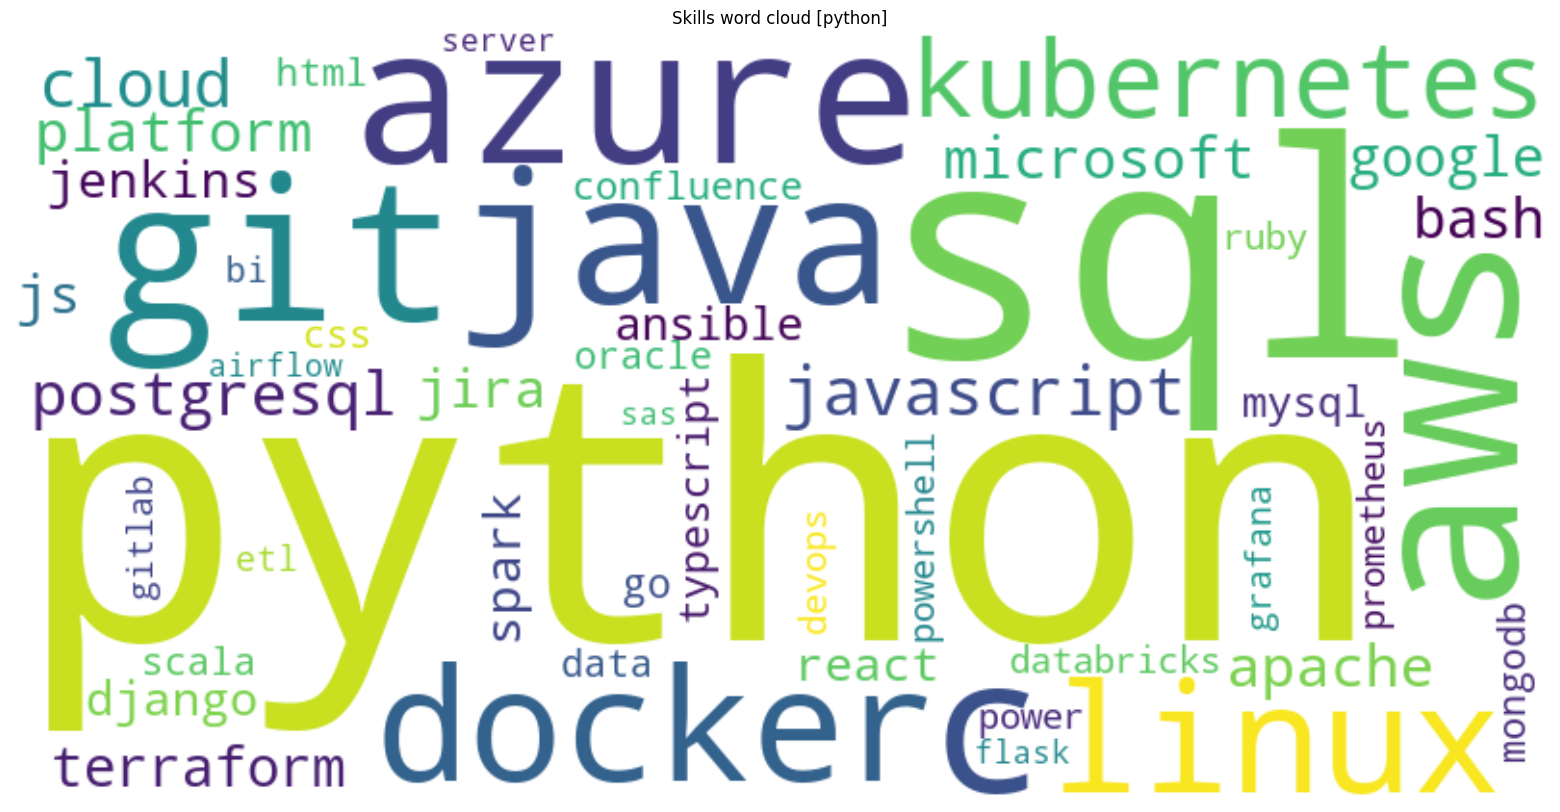

In [44]:
# skills_string['joined'] = skills_string[[0,1,2,3,4,5,6]].agg(', '.join, axis=1)
sum_string = ''
for column in skills_string.columns:
    sum_string += ' '.join(skills_string[column].str.lower())
# skills_string[0]
# skills_string.columns[0]
# skills_string[skills_string.columns[0]]
plt.figure(figsize=(20,10))
wc = WordCloud(background_color="white", stopwords=STOPWORDS, max_words=50,
              width=800, height=400, collocations=False)
wc.generate(sum_string)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Skills word cloud [python]')

Text(0.5, 1.0, 'skills frequency bar chart')

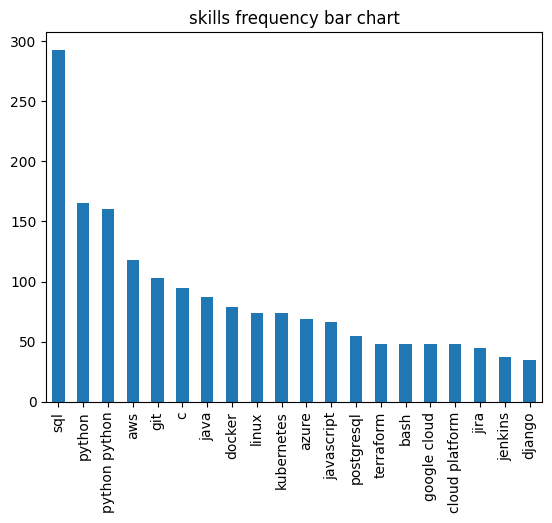

In [36]:
# freq_count_0 =  
# for col in skills_string.columns:
#     freq_count = skills_string[col].values_count()
# words_fc = pd.DataFrame(wc.words_)
words_fc = pd.Series(wc.words_)
words_fc =  np.ceil(words_fc * len(skills_clean))
words_fc[:20].plot.bar()
plt.title('skills frequency bar chart')

Text(0.5, 1.0, 'skills frequency pie chart')

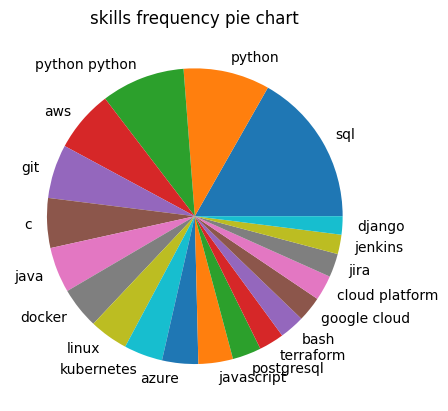

In [37]:
words_fc[:20].plot.pie()
plt.title('skills frequency pie chart')

In [38]:
help(wc)

Help on WordCloud in module wordcloud.wordcloud object:

class WordCloud(builtins.object)
 |  WordCloud(font_path=None, width=400, height=200, margin=2, ranks_only=None, prefer_horizontal=0.9, mask=None, scale=1, color_func=None, max_words=200, min_font_size=4, stopwords=None, random_state=None, background_color='black', max_font_size=None, font_step=1, mode='RGB', relative_scaling='auto', regexp=None, collocations=True, colormap=None, normalize_plurals=True, contour_width=0, contour_color='black', repeat=False, include_numbers=False, min_word_length=0, collocation_threshold=30)
 |  
 |  Word cloud object for generating and drawing.
 |  
 |  Parameters
 |  ----------
 |  font_path : string
 |      Font path to the font that will be used (OTF or TTF).
 |      Defaults to DroidSansMono path on a Linux machine. If you are on
 |      another OS or don't have this font, you need to adjust this path.
 |  
 |  width : int (default=400)
 |      Width of the canvas.
 |  
 |  height : int (defau

### Analyzing the job titles

Text(0.5, 1.0, 'Title word cloud')

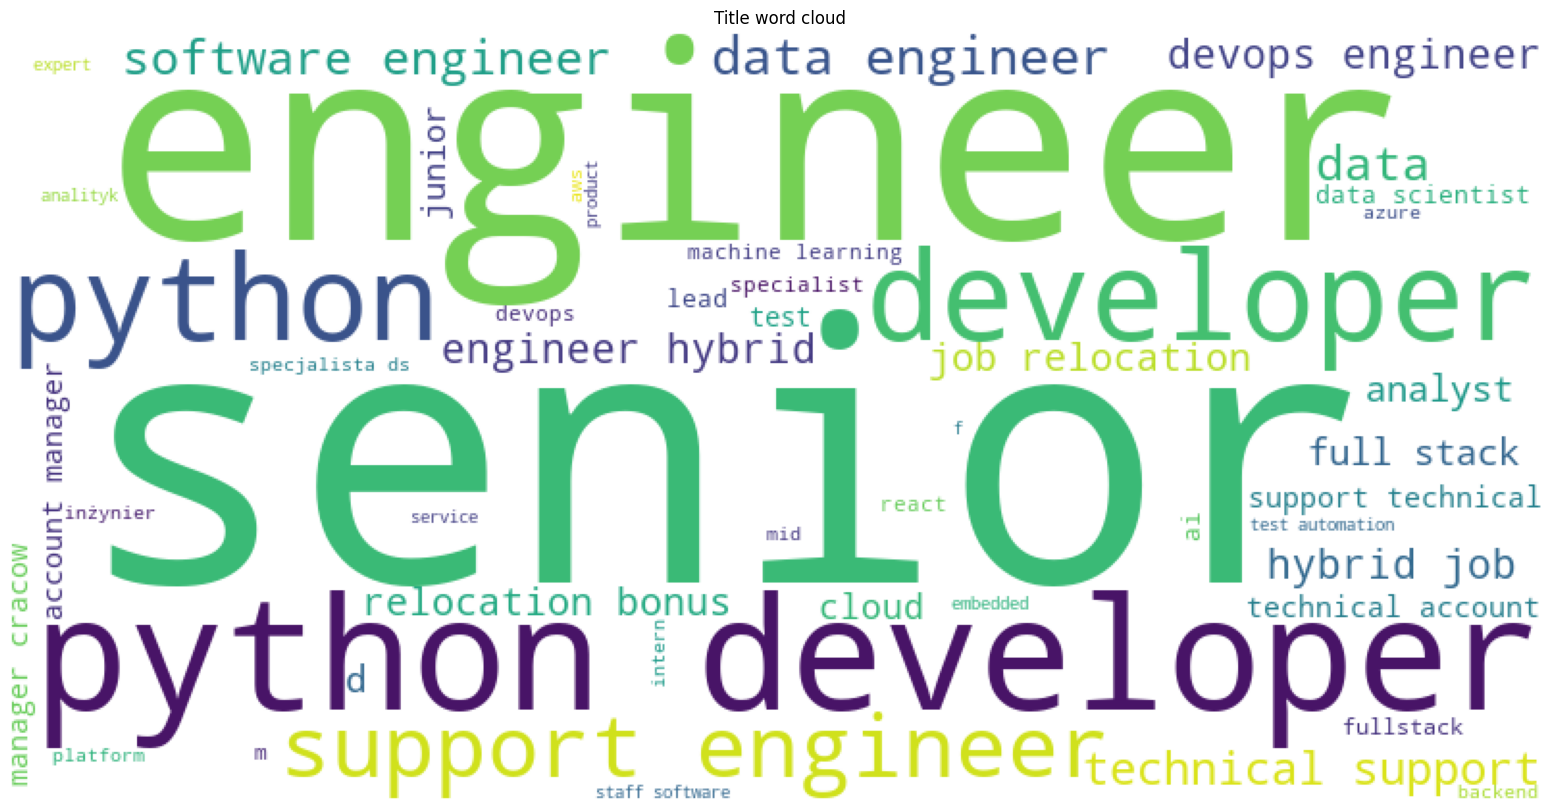

In [39]:
title_clean = df['title'].dropna()
len(title_clean)
title_string = ' '.join(title_clean.str.lower())
plt.figure(figsize=(20,10))
wc_title = WordCloud(background_color="white", stopwords=STOPWORDS, max_words=50,
                    width=800, height=400)
wc_title.generate(title_string)
plt.imshow(wc_title)
plt.axis('off')
plt.title('Title word cloud')

<Axes: >

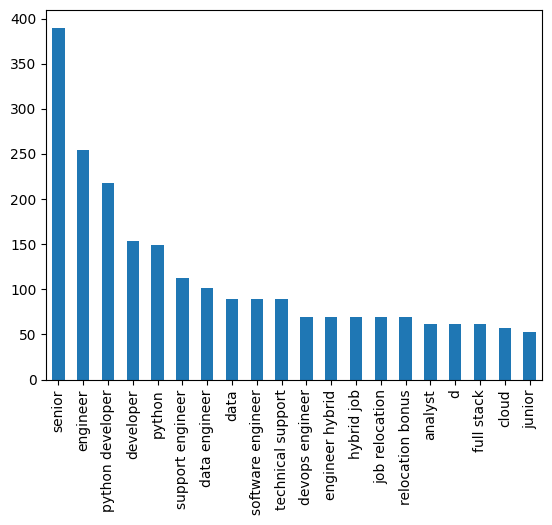

In [40]:
title_fc = pd.Series(wc_title.words_)
title_fc = np.ceil(title_fc * len(title_clean))
title_fc[:20].plot.bar()

### Companies

In [41]:
companies = df['company'].value_counts()
unique_companies = df['company'].unique()
print(companies.head(10))
print(len(unique_companies))

company
Luxoft                                         10
Accenture Intelligent Consulting Hub Europe     3
Dolby                                           3
Lime Brains                                     3
HRlink                                          3
Scalo                                           3
Allegro                                         3
Verkada                                         3
Alten                                           2
Assa Abloy                                      2
Name: count, dtype: int64
70


<Axes: ylabel='count'>

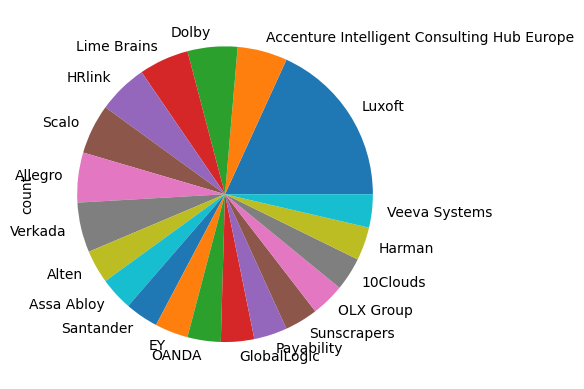

In [42]:
companies[:20].plot.pie()

### Description

333


Text(0.5, 1.0, 'Desc word cloud')

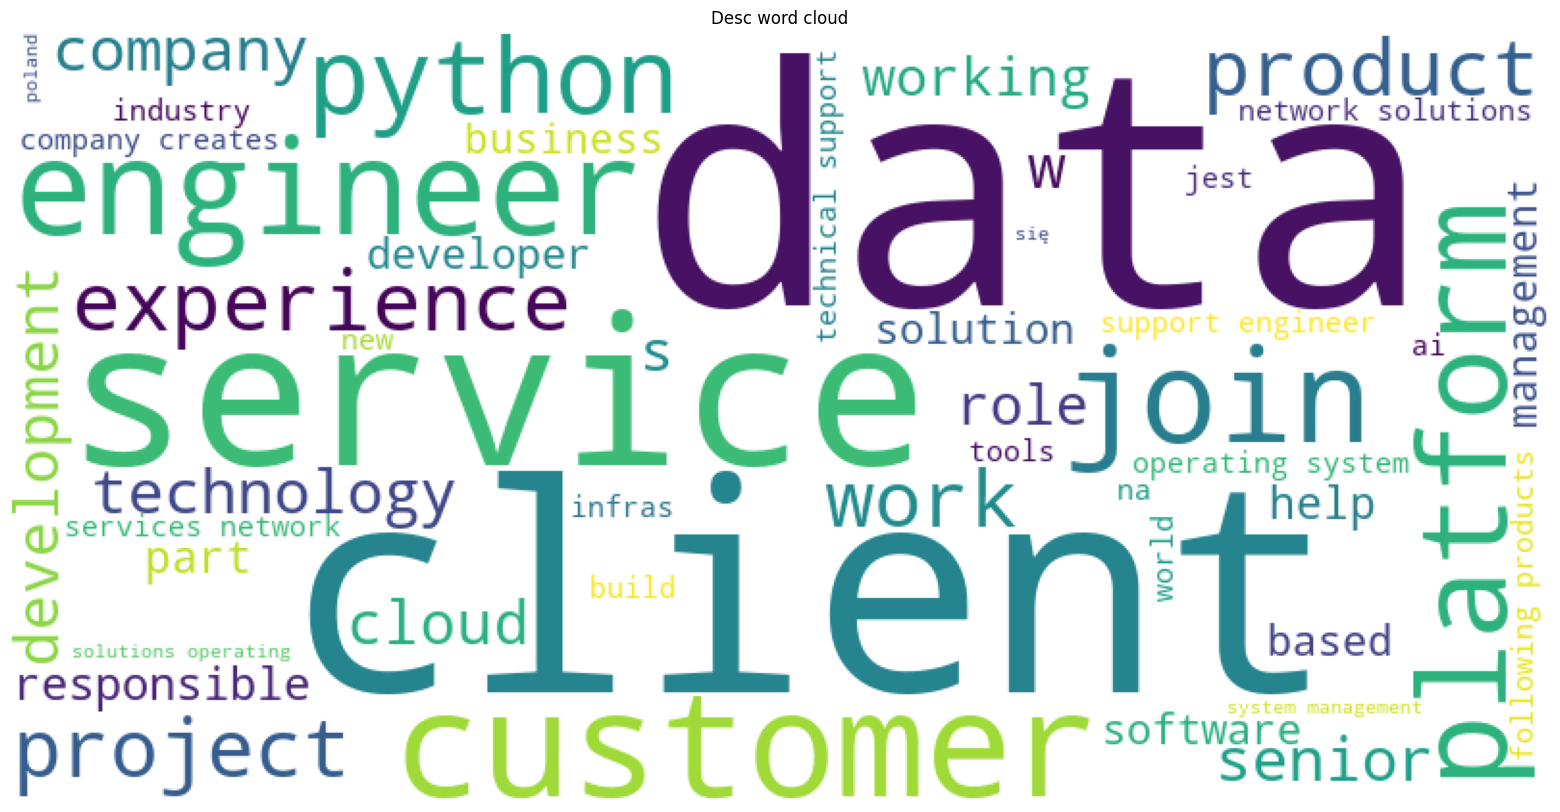

In [43]:
desc_clean = df['description'].dropna()
print(len(desc_clean))
desc_string = ' '.join(desc_clean.str.lower())
plt.figure(figsize=(20,10))
wc_desc = WordCloud(background_color="white", stopwords=STOPWORDS, max_words=50,
                    width=800, height=400)
wc_desc.generate(desc_string)
plt.imshow(wc_desc)
plt.axis('off')
plt.title('Desc word cloud')

### Date?

In [19]:
date_clean = df['date_added'].dropna()
print(len(date_clean))

0


### Location

In [20]:
location_clean = df['location'].dropna()
len(location_clean)

140

In [21]:
location_clean.sample(10)

29     Warszawa, mazowieckie
27                    Polska
55       Kraków, małopolskie
28                    Polska
24       Kraków, małopolskie
79     Warszawa, mazowieckie
93    Zabierzów, małopolskie
92              dolnośląskie
10     Wrocław, dolnośląskie
21       Kraków, małopolskie
Name: location, dtype: object

In [22]:
len(location_clean.unique())

22

In [23]:
location_clean.value_counts()

location
Kraków, małopolskie              44
Polska                           27
Warszawa, mazowieckie            24
Wrocław, dolnośląskie            13
Lublin, lubelskie                 4
Poznań, wielkopolskie             3
Gdynia, pomorskie                 3
Łódź, łódzkie                     3
Zabierzów, małopolskie            2
Gdańsk, pomorskie                 2
Katowice, śląskie                 2
Bydgoszcz, kujawsko-pomorskie     2
Opole, opolskie                   2
Sienno, mazowieckie               1
świętokrzyskie                    1
dolnośląskie                      1
Szczecin, zachodniopomorskie      1
Gorzów Wielkopolski, lubuskie     1
lubelskie                         1
mazowieckie                       1
Rzeszów, podkarpackie             1
Dąbrowa Górnicza, śląskie         1
Name: count, dtype: int64

<Axes: ylabel='count'>

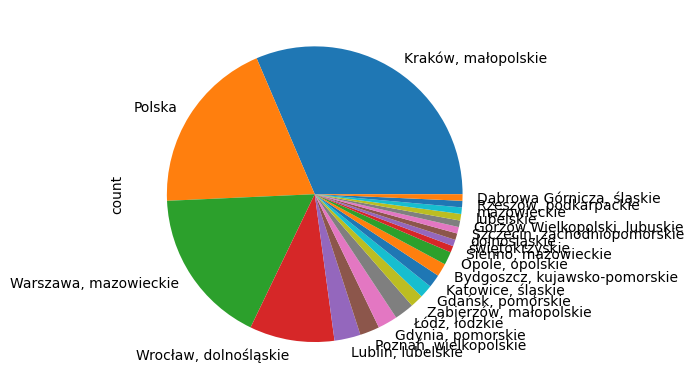

In [24]:
location_clean.value_counts().plot.pie()

### Salary?

In [25]:
salary_clean = df['salary'].dropna()
len(salary_clean)

129

In [26]:
len(salary_clean.unique())

104